
# 13. This question should be answered using the Weekly data set, which is part of the ISLP package. 

This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

In [1680]:
import pandas as pd
import numpy as np

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize)
from ISLP import confusion_table

from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

In [1681]:
weekly = load_data("Weekly") 
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


**Dataset**

Weekly percentage returns for the S&P 500 stock index between 1990 and 2010.
The term "percentage return" in finance typically refers to the percentage change in the price of a stock or an index over a given period.

The variable in the dataset includes:

1. Year: The year that the observation was recorded
2. Lag1: Percentage return for previous week
3. Lag2: Percentage return for 2 weeks previous
4. Lag3: Percentage return for 3 weeks previous
5. Lag4: Percentage return for 4 weeks previous
6. Lag5: Percentage return for 5 weeks previous
7. Volume: Volume of shares traded (average number of daily shares traded in billions)
8. Today: Percentage return for this week
9. Direction: A factor with levels ‘Down’ and ‘Up’ indicating whether the market had a positive or negative return on a given week.




## (a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [1682]:
# shape of dataset
weekly.shape

(1089, 9)

In [1683]:
# gives information about the variable
weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


In [1684]:
# no of unique values in each column
weekly.nunique()

Year           21
Lag1         1004
Lag2         1005
Lag3         1005
Lag4         1005
Lag5         1005
Volume       1089
Today        1003
Direction       2
dtype: int64

**The Direction column is categorical and there is not a single null values for any columns which is good.**

In [1685]:
# display the result about each of the numarical columns
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


1. The average percentage return for all of lag variables is nearly same, but std is 2.3 means, for some weeks the percentage return was near to the average value, but for some week it decrease or increase means up and down. 

2. The min and max values is supporting the above. 

3. The values between 25% to 75% are showing that there is high levarage of outliers in the data, that the difference between 25% to 75% of the data is small but beyond this are very large.

4. But when we see the min and max value for all of the column we can see all the columns has same min and max values, so we cannot either say there is outliers or high levarage points in the data. 

5. For some weeks average no of daily shares was too high, but for some these were low. 

In [1686]:
# display correlation matrix
weekly.corr()

/var/folders/xq/6knst1p10zx6vcf03b4zyf300000gn/T/ipykernel_13159/3651863042.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  weekly.corr()


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


**There is highly correlation between the year and volumn.**

**The low correlation suggest that there is no linear relationship between the columns**

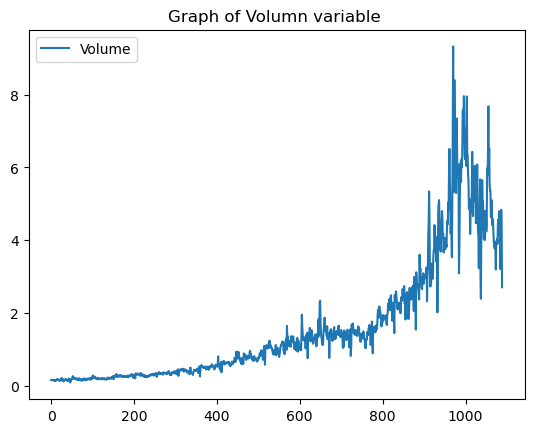

In [1687]:
weekly.plot(y='Volume')
plt.title('Graph of Volumn variable ')
plt.show()

**As the year progress the average number of daily share increase.**

## (b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors.
Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?


In [1688]:
# drop the selected columns into allvars
allvars = weekly.columns.drop(['Today', 'Direction', 'Year']) 
design = MS(allvars)

# transform the dataset for X and add the intercept as well
X = design.fit_transform(weekly)
# return true and false
y = weekly.Direction == 'Up'

glm = sm.GLM(y, X, family=sm.families.Binomial()) 
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.2669,0.086,3.106,0.002
Lag1,-0.0413,0.026,-1.563,0.118
Lag2,0.0584,0.027,2.175,0.030
Lag3,-0.0161,0.027,-0.602,0.547
Lag4,-0.0278,0.026,-1.050,0.294
Lag5,-0.0145,0.026,-0.549,0.583
Volume,-0.0227,0.037,-0.616,0.538


**Yes, the lag2 variable is statistically significant**


## (c) Compute the confusion matrix and overall fraction of correct predictions. 
Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [1689]:
# predict the result of training data
probs = results.predict()

In [1690]:
# set the threshold for probability
labels = np.array(['Down'] * weekly.shape[0]) 
labels[probs>0.5] = "Up"

In [1691]:
# display the confusion_table of predected value with actual value
confusion_table(labels, weekly.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [1692]:
(54+557)/weekly.shape[0], np.mean(labels == weekly.Direction)

(0.5610651974288338, 0.5610651974288338)

## (d) Now fit the logistic regression model using a training data period from 1990 to 2008,
with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

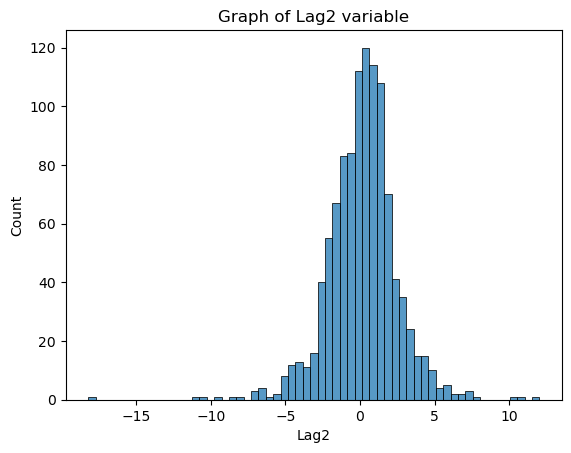

In [1693]:
sns.histplot(data=weekly, x="Lag2")
plt.title('Graph of Lag2 variable')
plt.show()

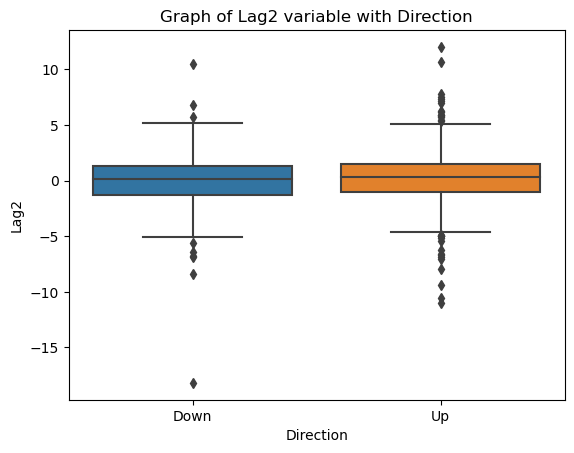

In [1694]:
sns.boxplot(data=weekly, x="Direction", y="Lag2")
plt.title('Graph of Lag2 variable with Direction')
plt.show()

In [1695]:
# select all the observation where year <= 2008 and make true else false
train = (weekly.Year <= 2008)

# get only observation where year <=2008
weekly_train = weekly.loc[train] 
weekly_train = weekly_train[['Lag2', 'Direction']]

# get only observation where year !=> 2008
weekly_test = weekly.loc[~train] 
weekly_test = weekly_test[['Lag2', 'Direction']]

weekly_train.shape, weekly_test.shape

((985, 2), (104, 2))

In [1696]:
# drop the selected columns into allvars
allvars = weekly_train.columns.drop(['Direction']) 
design = MS(allvars)

# transform the dataset for X and add the intercept as well
X_train_lr = design.fit_transform(weekly_train)
y_train_lr = weekly_train.Direction == 'Up'

glm = sm.GLM(y_train_lr, X_train_lr, family=sm.families.Binomial()) 
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.2033,0.064,3.162,0.002
Lag2,0.0581,0.029,2.024,0.043


In [1697]:
# split the data into 2 parts training and testing
X_test, y_test= weekly_test[['Lag2']], weekly_test[['Direction']]

In [1698]:
# add again intercept for testing dataset
design = MS(X_test)

X_test_lr = design.fit_transform(X_test)

In [1699]:
# predict the test dataset
probs = results.predict(exog=X_test_lr)

In [1700]:
# make all the labels initialy Down
labels = np.array(['Down'] * y_test.shape[0]) 
# where probability > .5, change to Up there
labels[probs>0.5] = "Up"

In [1701]:
# draw confusion table
confusion_table(labels, y_test.Direction)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [1702]:
np.mean(labels == y_test.Direction)

0.625

## (e) Repeat (d) using LDA.

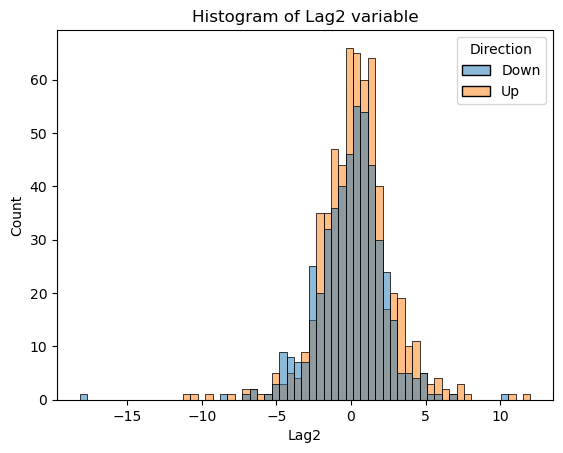

In [1703]:
sns.histplot(data=weekly, x="Lag2", hue='Direction')
plt.title('Histogram of Lag2 variable')
plt.show()

In [1704]:
# split the data into X_train only predictors and y_train as response
X_train, y_train = weekly_train[['Lag2']], weekly_train[['Direction']]

In [1705]:
lda = LDA(store_covariance=True)

In [1706]:
lda.fit(X_train, y_train)

/Users/khayam/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(store_covariance=True)

In [1707]:
# mean of the data
lda.means_

array([[-0.03568254],
       [ 0.26036581]])

In [1708]:
# prior probability
lda.priors_

array([0.44771574, 0.55228426])

In [1709]:
# make prediction on test data
lda_pred = lda.predict(X_test)

In [1710]:
confusion_table(lda_pred, y_test.Direction)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [1711]:
np.mean(lda_pred == y_test.Direction)

0.625

## (f) Repeat (d) using QDA.

In [1712]:
# set the QDA model
qda = QDA(store_covariance=True) 
qda.fit(X_train, y_train)

/Users/khayam/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


QuadraticDiscriminantAnalysis(store_covariance=True)

In [1713]:
# prediction of QDA model on test data
qda_pred = qda.predict(X_test) 

# confusion matrix
confusion_table(qda_pred, y_test)

Truth,Direction,Up
Predicted,,
Direction,0,0
Up,0,61


In [1714]:
np.mean(qda_pred == y_test.Direction)

0.5865384615384616

## (g) Repeat (d) using KNN with K = 1.

In [1715]:
# value of the k = 1
knn1 = KNeighborsClassifier(n_neighbors=1) 
knn1.fit(X_train, y_train)
knn1_pred = knn1.predict(X_test) 
# confusion matrix
confusion_table(knn1_pred, y_test.Direction)

/Users/khayam/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Truth,Down,Up
Predicted,,
Down,21,30
Up,22,31


In [1716]:
# prediction of knn
np.mean(knn1_pred == y_test.Direction)

0.5

## (h) Repeat (d) using naive Bayes.

In [1717]:
# set the naive bayes
NB = GaussianNB() 
NB.fit(X_train, y_train)

/Users/khayam/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [1718]:
NB.classes_

array(['Down', 'Up'], dtype='<U4')

In [1719]:
NB.class_prior_

array([0.44771574, 0.55228426])

In [1720]:
NB.theta_

array([[-0.03568254],
       [ 0.26036581]])

In [1721]:
NB.var_

array([[4.82684748],
       [5.3608662 ]])

In [1722]:
nb_labels = NB.predict(X_test) 
confusion_table(nb_labels, y_test)

Truth,Direction,Up
Predicted,,
Direction,0,0
Up,0,61


In [1723]:
# prediction of naive bayes
np.mean(nb_labels == y_test.Direction)

0.5865384615384616

## (i) Which of these methods appears to provide the best results on this data?

**Logistic regression and Linear Discriminant Analysis methods performed well on this data**

## (j) Experiment with different combinations of predictors, including possible transformations and interactions, 
for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

In [1724]:
weekly_df = weekly[['Lag1','Lag2','Lag3','Lag4','Lag5','Direction']].copy()
weekly_df.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Direction
0,0.816,1.572,-3.936,-0.229,-3.484,Down
1,-0.270,0.816,1.572,-3.936,-0.229,Down
2,-2.576,-0.270,0.816,1.572,-3.936,Up
3,3.514,-2.576,-0.270,0.816,1.572,Up
4,0.712,3.514,-2.576,-0.270,0.816,Up


In [1725]:
weekly_df['Direction'] = weekly_df['Direction'].map({'Up': 1, 'Down': 0})

In [1726]:
# convert data into training and testing
X_train, X_test , y_train , y_test = train_test_split(feature_std, y , test_size=.2)

# shape of the train and test data
X_train.shape, X_test.shape

((871, 7), (218, 7))

## Dataset with all 5 lag predictors and volumne for all the methods

### Logistic Regression

In [1727]:
design = MS(X_train)

X_train_lr = design.fit_transform(X_train)

glm = sm.GLM(y_train, X_train_lr, family=sm.families.Binomial()) 
results = glm.fit()

design = MS(X_train)
X_test_lr = design.fit_transform(X_test)

probs = results.predict(X_test_lr)

labels = np.zeros(probs.shape, dtype=int)

# Set labels to 1 where probs > 0.5
labels[probs > 0.5] = 1

confusion_table(labels, y_test)

Truth,0,1
Predicted,,
0,11,15
1,85,107


In [1728]:
np.mean(labels == y_test)

0.5412844036697247

### LDA

In [1729]:
lda = LDA(store_covariance=True)
lda.fit(X_train, y_train)

lda_pred = lda.predict(X_test)
confusion_table(lda_pred, y_test)

Truth,False,True
Predicted,,
False,11,14
True,85,108


In [1730]:
np.mean(lda_pred == y_test)

0.5458715596330275

### QDA

In [1731]:
qda = QDA(store_covariance=True) 
qda.fit(X_train, y_train)

qda_pred = qda.predict(X_test) 
confusion_table(qda_pred, y_test)

Truth,False,True
Predicted,,
False,63,79
True,33,43


In [1732]:
np.mean(qda_pred == y_test)

0.48623853211009177

### KNN

In [1733]:
knn1 = KNeighborsClassifier(n_neighbors=1) 
knn1.fit(X_train, y_train)
knn1_pred = knn1.predict(X_test) 
confusion_table(knn1_pred, y_test)

Truth,False,True
Predicted,,
False,37,57
True,59,65


In [1734]:
np.mean(knn1_pred == y_test)

0.46788990825688076

### Naive Bayes

In [1735]:
NB = GaussianNB() 
NB.fit(X_train, y_train)

nb_labels = NB.predict(X_test) 
confusion_table(nb_labels, y_test)

Truth,False,True
Predicted,,
False,60,69
True,36,53


In [1736]:
np.mean(nb_labels == y_test)

0.518348623853211

**KNN accuracy is higher from others, when 5 predictors were used**

## Applying Standard Scaler on the dataset

In [1737]:
scaler = StandardScaler(with_mean=True, with_std=True,copy=True)

In [1738]:
X = X.iloc[:,1:]

In [1739]:
scaler.fit(X)
X_std = scaler.transform(X)

In [1740]:
feature_std = pd.DataFrame(X_std, columns=X.columns)
feature_std.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,0.282443,0.603063,-1.730598,-0.158875,-1.535417,-0.842087
1,-0.178522,0.282204,0.603876,-1.730174,-0.156297,-0.845884
2,-1.157328,-0.178713,0.283458,0.604521,-1.726927,-0.839203
3,1.427638,-1.157419,-0.176825,0.284072,0.606774,-0.838140
4,0.238299,1.427282,-1.154185,-0.176254,0.286462,-0.842827


In [1741]:
# convert data into training and testing
X_train, X_test , y_train , y_test = train_test_split(feature_std, y , test_size=.2)

# shape of the train and test data
X_train.shape, X_test.shape

((871, 6), (218, 6))

### Logistic Regression

In [1742]:
design = MS(X_train)

X_train_lr = design.fit_transform(X_train)

glm = sm.GLM(y_train, X_train_lr, family=sm.families.Binomial()) 
results = glm.fit()

design = MS(X_train)
X_test_lr = design.fit_transform(X_test)

probs = results.predict(X_test_lr)

labels = np.zeros(probs.shape, dtype=int)

# Set labels to 1 where probs > 0.5
labels[probs > 0.5] = 1

confusion_table(labels, y_test)

Truth,0,1
Predicted,,
0,2,8
1,100,108


In [1743]:
np.mean(labels == y_test)

0.5045871559633027

### LDA

In [1744]:
lda = LDA(store_covariance=True)
lda.fit(X_train, y_train)

lda_pred = lda.predict(X_test)
confusion_table(lda_pred, y_test)

Truth,False,True
Predicted,,
False,2,8
True,100,108


In [1745]:
np.mean(lda_pred == y_test)

0.5045871559633027

### QDA

In [1746]:
qda = QDA(store_covariance=True) 
qda.fit(X_train, y_train)

qda_pred = qda.predict(X_test) 
confusion_table(qda_pred, y_test)

Truth,False,True
Predicted,,
False,30,37
True,72,79


In [1747]:
np.mean(qda_pred == y_test)

0.5

### KNN

In [1748]:
knn1 = KNeighborsClassifier(n_neighbors=1) 
knn1.fit(X_train, y_train)
knn1_pred = knn1.predict(X_test) 
confusion_table(knn1_pred, y_test)

Truth,False,True
Predicted,,
False,37,56
True,65,60


In [1749]:
np.mean(knn1_pred == y_test)

0.44495412844036697

### Naive Bayes

In [1750]:
NB = GaussianNB() 
NB.fit(X_train, y_train)

nb_labels = NB.predict(X_test) 
confusion_table(nb_labels, y_test)

Truth,False,True
Predicted,,
False,17,18
True,85,98


In [1751]:
np.mean(nb_labels == y_test)

0.5275229357798165

**After applying standard scaler logistic regression and LDA accuracy has increased.** 

## Taking 2 predictors (Lag1 & Lag2) and adding Intercation Term (Lag1 * Lag2) on actual dataset

In [1752]:
weekly_df['Lag1_Lag2'] = weekly_df['Lag1'] * weekly_df['Lag2']

In [1753]:
# convert data into training and testing
X_train, X_test , y_train , y_test = train_test_split(weekly_df[['Lag1','Lag2','Lag1_Lag2']], weekly_df['Direction'] , test_size=.2)

# shape of the train and test data
X_train.shape, X_test.shape

((871, 3), (218, 3))

### Logistic Regression

In [1754]:
design = MS(X_train)

X_train_lr = design.fit_transform(X_train)

glm = sm.GLM(y_train, X_train_lr, family=sm.families.Binomial()) 
results = glm.fit()

design = MS(X_train)
X_test_lr = design.fit_transform(X_test)

probs = results.predict(X_test_lr)

labels = np.zeros(probs.shape, dtype=int)

# Set labels to 1 where probs > 0.5
labels[probs > 0.5] = 1

confusion_table(labels, y_test)

Truth,0,1
Predicted,,
0,9,14
1,79,116


In [1755]:
np.mean(labels == y_test)

0.573394495412844

### LDA

In [1756]:
lda = LDA(store_covariance=True)
lda.fit(X_train, y_train)

lda_pred = lda.predict(X_test)
confusion_table(lda_pred, y_test)

Truth,0,1
Predicted,,
0,9,14
1,79,116


In [1757]:
np.mean(lda_pred == y_test)

0.573394495412844

### QDA

In [1758]:
qda = QDA(store_covariance=True) 
qda.fit(X_train, y_train)

qda_pred = qda.predict(X_test) 
confusion_table(qda_pred, y_test)

Truth,0,1
Predicted,,
0,67,104
1,21,26


In [1759]:
np.mean(qda_pred == y_test)

0.42660550458715596

### KNN

In [1760]:
knn1 = KNeighborsClassifier(n_neighbors=1) 
knn1.fit(X_train, y_train)
knn1_pred = knn1.predict(X_test) 
confusion_table(knn1_pred, y_test)

Truth,0,1
Predicted,,
0,41,47
1,47,83


In [1761]:
np.mean(knn1_pred == y_test)

0.5688073394495413

### Naive Bayes

In [1762]:
NB = GaussianNB() 
NB.fit(X_train, y_train)

nb_labels = NB.predict(X_test) 
confusion_table(nb_labels, y_test)

Truth,0,1
Predicted,,
0,67,102
1,21,28


In [1763]:
np.mean(nb_labels == y_test)

0.43577981651376146

## Taking 2 predictors (Lag1 & Lag2) and adding Intercation Term (Lag1 * Lag2) on standarized dataset

In [1764]:
feature_std['Lag1_Lag2'] = feature_std['Lag1'] * feature_std['Lag2']

In [1765]:
# convert data into training and testing
X_train, X_test , y_train , y_test = train_test_split(feature_std, y , test_size=.2)

# shape of the train and test data
X_train.shape, X_test.shape

((871, 7), (218, 7))

### Logistic Regression

In [1766]:
design = MS(X_train)

X_train_lr = design.fit_transform(X_train)

glm = sm.GLM(y_train, X_train_lr, family=sm.families.Binomial()) 
results = glm.fit()

design = MS(X_train)
X_test_lr = design.fit_transform(X_test)

probs = results.predict(X_test_lr)

labels = np.zeros(probs.shape, dtype=int)

# Set labels to 1 where probs > 0.5
labels[probs > 0.5] = 1

confusion_table(labels, y_test)

Truth,0,1
Predicted,,
0,11,8
1,94,105


In [1767]:
np.mean(labels == y_test)

0.5321100917431193

### LDA

In [1768]:
lda = LDA(store_covariance=True)
lda.fit(X_train, y_train)

lda_pred = lda.predict(X_test)
confusion_table(lda_pred, y_test)

Truth,False,True
Predicted,,
False,11,8
True,94,105


In [1769]:
np.mean(lda_pred == y_test)

0.5321100917431193

### QDA

In [1770]:
qda = QDA(store_covariance=True) 
qda.fit(X_train, y_train)

qda_pred = qda.predict(X_test) 
confusion_table(qda_pred, y_test)

Truth,False,True
Predicted,,
False,17,25
True,88,88


In [1771]:
np.mean(qda_pred == y_test)

0.481651376146789

### KNN

In [1772]:
knn1 = KNeighborsClassifier(n_neighbors=1) 
knn1.fit(X_train, y_train)
knn1_pred = knn1.predict(X_test) 
confusion_table(knn1_pred, y_test)

Truth,False,True
Predicted,,
False,46,46
True,59,67


In [1773]:
np.mean(knn1_pred == y_test)

0.518348623853211

### Naive Bayes

In [1774]:
NB = GaussianNB() 
NB.fit(X_train, y_train)

nb_labels = NB.predict(X_test) 
confusion_table(nb_labels, y_test)

Truth,False,True
Predicted,,
False,13,12
True,92,101


In [1775]:
np.mean(nb_labels == y_test)

0.5229357798165137

**By adding the interaction term in Standarized dataset the model accuracy has decrease**

## Only with the 1 standardized predictor 

In [1776]:
# convert data into training and testing
X_train, X_test , y_train , y_test = train_test_split(feature_std[['Lag1']], y , test_size=.2)

# shape of the train and test data
X_train.shape, X_test.shape

((871, 1), (218, 1))

### Logistic Regression

In [1777]:
design = MS(X_train)

X_train_lr = design.fit_transform(X_train)

glm = sm.GLM(y_train, X_train_lr, family=sm.families.Binomial()) 
results = glm.fit()

design = MS(X_train)
X_test_lr = design.fit_transform(X_test)

probs = results.predict(X_test_lr)

labels = np.zeros(probs.shape, dtype=int)

# Set labels to 1 where probs > 0.5
labels[probs > 0.5] = 1

confusion_table(labels, y_test)

Truth,0,1
Predicted,,
0,7,11
1,85,115


In [1778]:
np.mean(labels == y_test)

0.5596330275229358

### LDA 

In [1779]:
lda = LDA(store_covariance=True)
lda.fit(X_train, y_train)

lda_pred = lda.predict(X_test)
confusion_table(lda_pred, y_test)

Truth,False,True
Predicted,,
False,6,10
True,86,116


In [1780]:
np.mean(lda_pred == y_test)

0.5596330275229358

### QDA

In [1781]:
qda = QDA(store_covariance=True) 
qda.fit(X_train, y_train)

qda_pred = qda.predict(X_test) 
confusion_table(qda_pred, y_test)

Truth,False,True
Predicted,,
False,3,7
True,89,119


In [1782]:
np.mean(qda_pred == y_test)

0.5596330275229358

### KNN

In [1783]:
knn1 = KNeighborsClassifier(n_neighbors=1) 
knn1.fit(X_train, y_train)
knn1_pred = knn1.predict(X_test) 
confusion_table(knn1_pred, y_test)

Truth,False,True
Predicted,,
False,37,56
True,55,70


In [1784]:
np.mean(knn1_pred == y_test)

0.4908256880733945

### Naive Bayes

In [1785]:
NB = GaussianNB() 
NB.fit(X_train, y_train)

nb_labels = NB.predict(X_test) 
confusion_table(nb_labels, y_test)

Truth,False,True
Predicted,,
False,3,7
True,89,119


In [1786]:
np.mean(nb_labels == y_test)

0.5596330275229358

## Testing the different K values

### For 1 Predictor on standarized Dataset

In [1787]:
# convert data into training and testing
X_train, X_test , y_train , y_test = train_test_split(feature_std[['Lag2']], y , test_size=.2)

# shape of the train and test data
X_train.shape, X_test.shape

((871, 1), (218, 1))

In [1788]:
# k = 3
knn1 = KNeighborsClassifier(n_neighbors=3) 
knn1.fit(X_train, y_train)
knn1_pred = knn1.predict(X_test) 
confusion_table(knn1_pred, y_test)

Truth,False,True
Predicted,,
False,33,39
True,77,69


In [1789]:
np.mean(knn1_pred == y_test)

0.46788990825688076

### For 1 Predictor on actual Dataset without Standarized

In [1790]:
# convert data into training and testing
X_train, X_test , y_train , y_test = train_test_split(weekly_df[['Lag2']], y , test_size=.2)

# shape of the train and test data
X_train.shape, X_test.shape

((871, 1), (218, 1))

In [1791]:
# k = 3
knn1 = KNeighborsClassifier(n_neighbors=3) 
knn1.fit(X_train, y_train)
knn1_pred = knn1.predict(X_test) 
confusion_table(knn1_pred, y_test)

Truth,False,True
Predicted,,
False,33,54
True,62,69


In [1792]:
np.mean(knn1_pred == y_test)

0.46788990825688076

### By using the only Lag predictors with k = 3

In [1793]:
# convert data into training and testing
X_train, X_test , y_train , y_test = train_test_split(weekly_df.iloc[:,:-1], y , test_size=.2)

# shape of the train and test data
X_train.shape, X_test.shape

((871, 6), (218, 6))

In [1794]:
# k = 3
knn1 = KNeighborsClassifier(n_neighbors=3) 
knn1.fit(X_train, y_train)
knn1_pred = knn1.predict(X_test) 
confusion_table(knn1_pred, y_test)

Truth,False,True
Predicted,,
False,81,12
True,24,101


In [1795]:
np.mean(knn1_pred == y_test)

0.8348623853211009

**When using the using all 5 lag predictors, LDA perfomed well** 

1. LR .56
2. LDA .57
3. QDA .51
4. KNN .54
5. NB .54


**When using the using lag1 predictors, LDA and LR perfomred well** 

1. LR .625
2. LDA .625
3. QDA .58
4. KNN .5
5. NB .58

**When using the using standarized Scaller dataset with 5 lag predictors** 
1. LR .54
2. LDA .54
3. QDA .5
4. KNN .48
5. NB .51

**When taking 2 predictors and interaction term between them**
1. LR .59
2. LDA .59
3. QDA .44
4. KNN .54
5. NB .44

**When taking 1 predictor standarized for each model accuracy was not increased**

**When taking 1 predictor without standarized accuracy increased to .80**